In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
from bs4 import BeautifulSoup
import re
import nltk
import en_core_web_sm

from nltk.corpus import stopwords
nlp = en_core_web_sm.load()
from nltk.stem.wordnet import WordNetLemmatizer 
lemmatize = WordNetLemmatizer()
stopwords = set(STOPWORDS)
color = sns.color_palette()
%matplotlib inline

def get_root(phrases):
    root_words = []
    if(type(phrases) == list):        
        for i in phrases:
            if(type(i) == list):
                doc = nlp(' '.join(i))
                root_words.append([item.lemma_ for item in doc])
            else:
                doc = nlp(i)
                for item in doc:
                    root_words.append(item.lemma_)
                
    else:
        doc = nlp(phrases)
        for item in doc:
            root_words.append(item.lemma_)
        
    return root_words

In [9]:
reviews = pd.read_csv("Reviews.csv", encoding='utf8', low_memory = False)

In [74]:
reviews.sort_values("HelpfulnessNumerator", ascending = False)

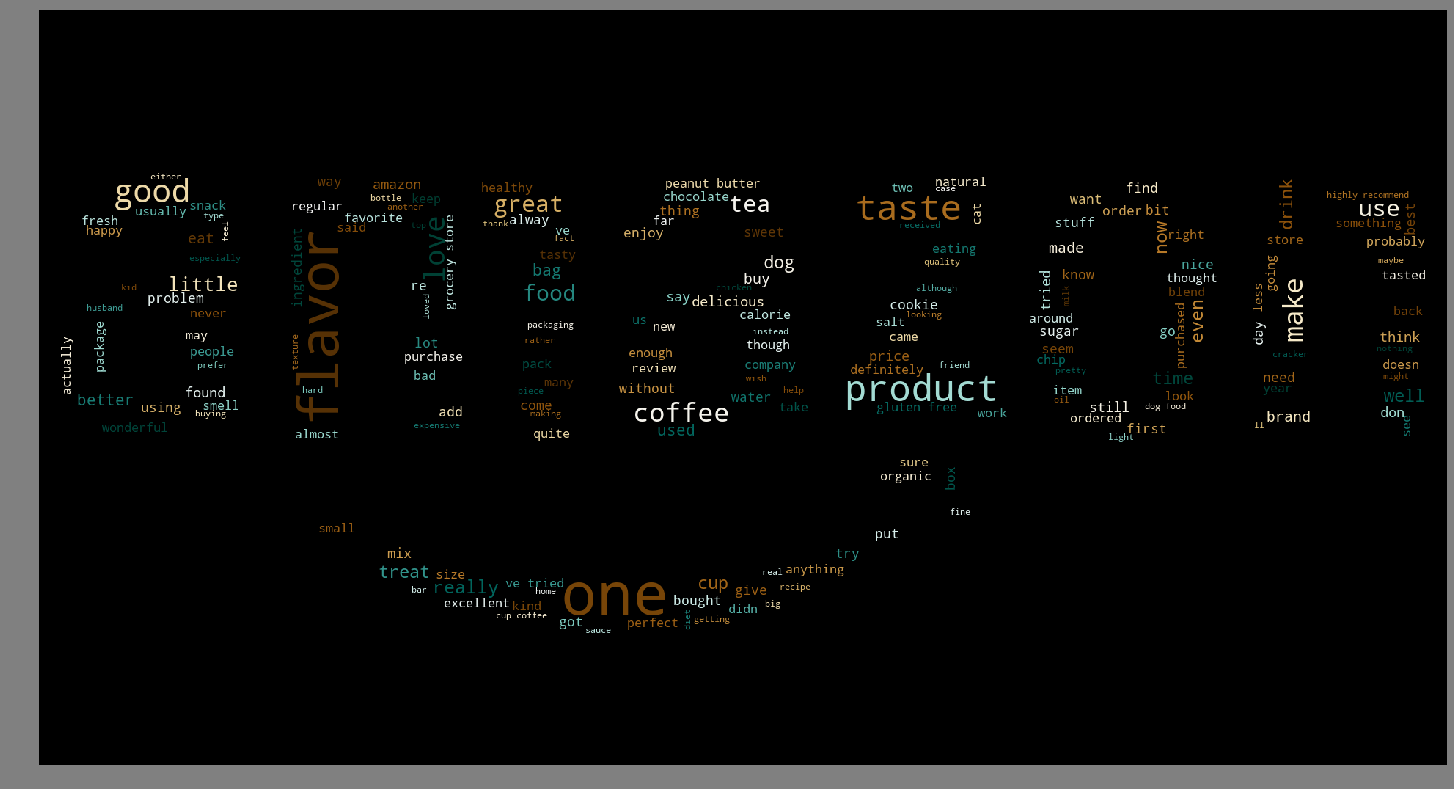

In [161]:
noise_set = ["a", "is", "the", "as", "was", "i", "me", "we", "our",
              "it", "am", "are", "were", "be", "to", "-PRON-", "and",
            "much", "will"]

stop_words = list(stopwords) + list(noise_set)

def to_words(review):  
    no_html = BeautifulSoup(review).get_text()
    no_punctuation = re.sub("[^a-zA-Z0-9]", " ", no_html) 
    string_words = no_punctuation.lower().split()  
    return(' '.join(string_words))

data = reviews['Text'][1:20000]
words = ' '.join([to_words(i) for i in data])

mask = np.array(Image.open('masks-wordclouds/amazon1.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='black', colormap="BrBG_r",
                       mask=mask, stopwords = stop_words, relative_scaling = 1).generate(words)
plt.figure(figsize=(20,15),facecolor = 'grey', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

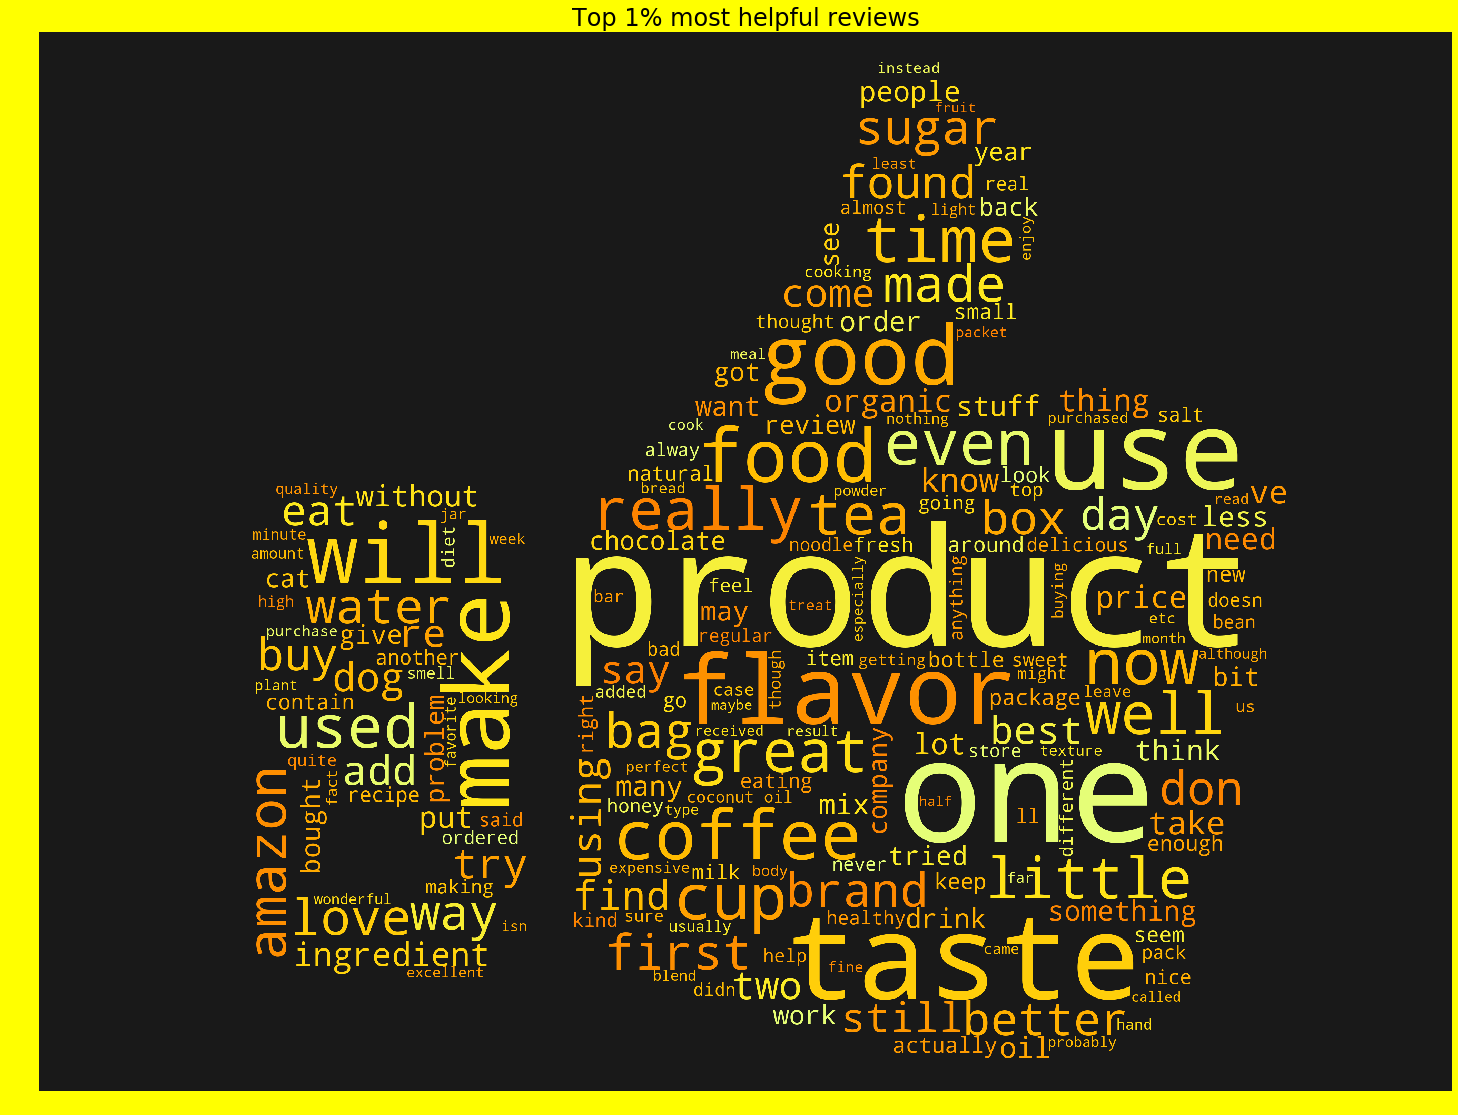

In [120]:
ulimit = np.percentile(reviews.HelpfulnessNumerator.values, 99)
top_helpful1 = reviews[reviews['HelpfulnessNumerator'] > ulimit]['Text'].unique()
words = ' '.join([to_words(i) for i in top_helpful1])

mask = np.array(Image.open('masks-wordclouds/upvote.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='#191919', colormap="Wistia",
                       mask=mask, stopwords = stop_words, relative_scaling = 1).generate(words)
plt.figure(figsize=(20,15),facecolor = 'yellow', edgecolor='orange')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Top 1% most helpful reviews (text)", fontsize = 24)
plt.show()

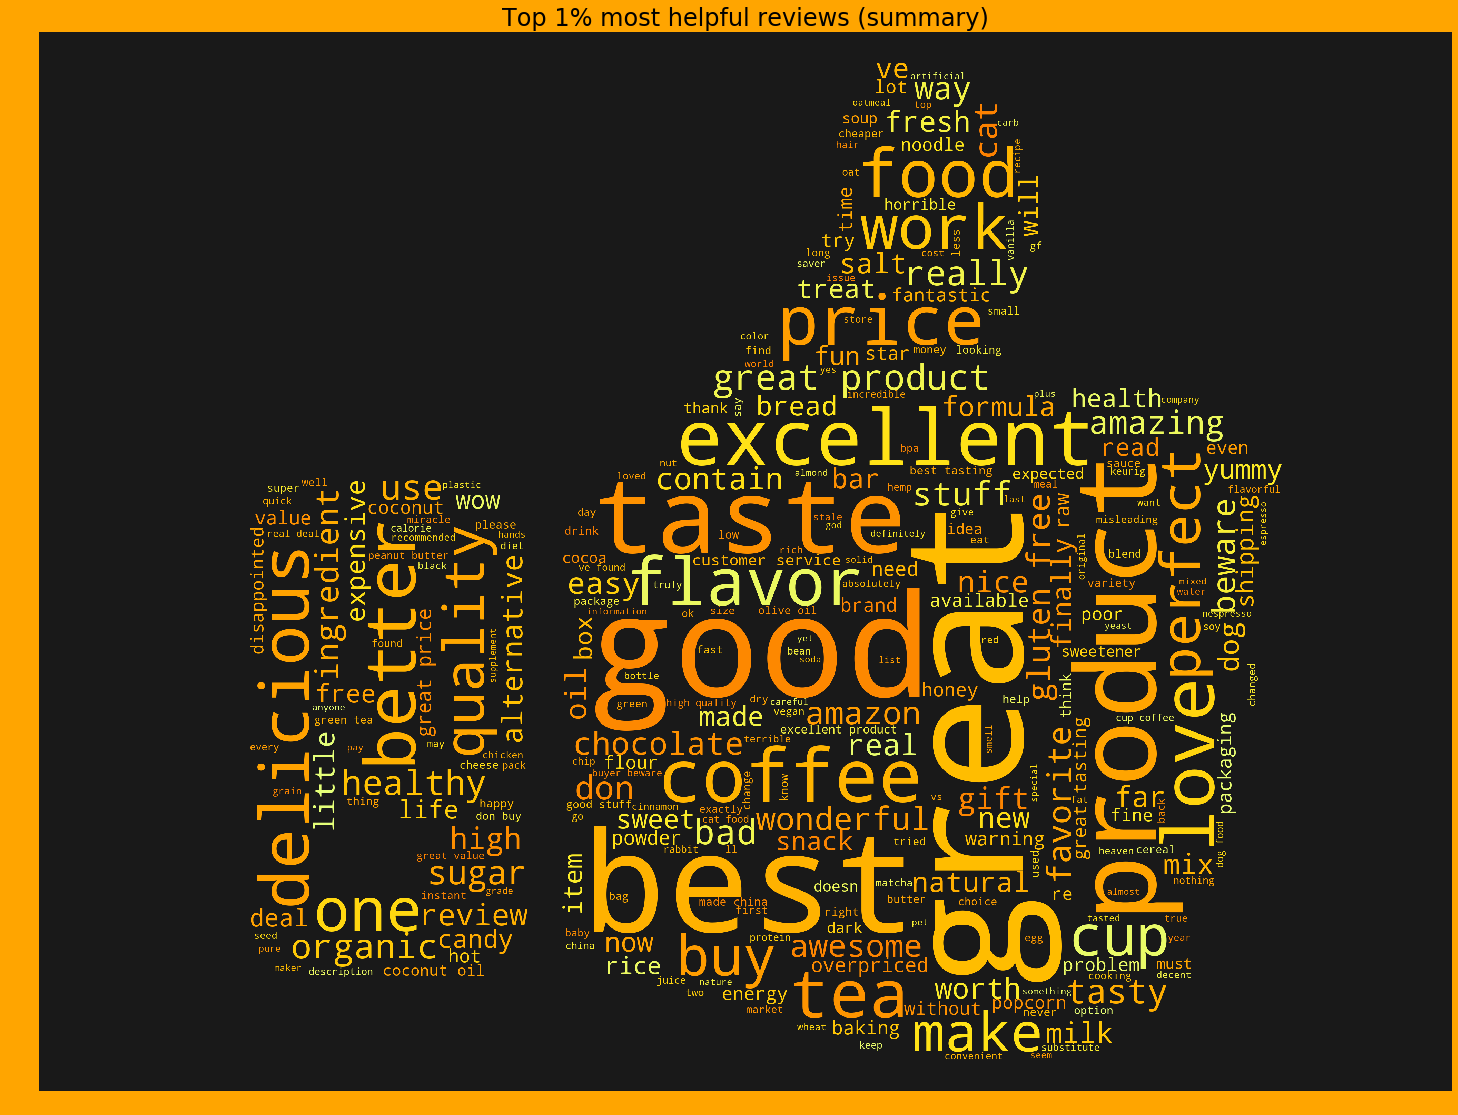

In [159]:
ulimit = np.percentile(reviews.HelpfulnessNumerator.values, 99)
top_helpful1 = reviews[reviews['HelpfulnessNumerator'] > ulimit]['Summary'].unique()
words = ' '.join([to_words(i) for i in top_helpful1])

mask = np.array(Image.open('masks-wordclouds/upvote.png'))
word_cloud = WordCloud(width = 1000, height = 512, background_color='#191919', colormap="Wistia",
                       mask=mask, stopwords = stop_words, max_words = 300).generate(words)
plt.figure(figsize=(20,15),facecolor = 'orange', edgecolor='yellow')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Top 1% most helpful reviews (summary)", fontsize = 24)
plt.show()

In [115]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [162]:
score_5 = reviews[reviews['Score'] == 5]['Summary'].unique()
score_5 = ' '.join([to_words(i) for i in score_5])

Text(0.5, 1.0, '5-star rated reviews')

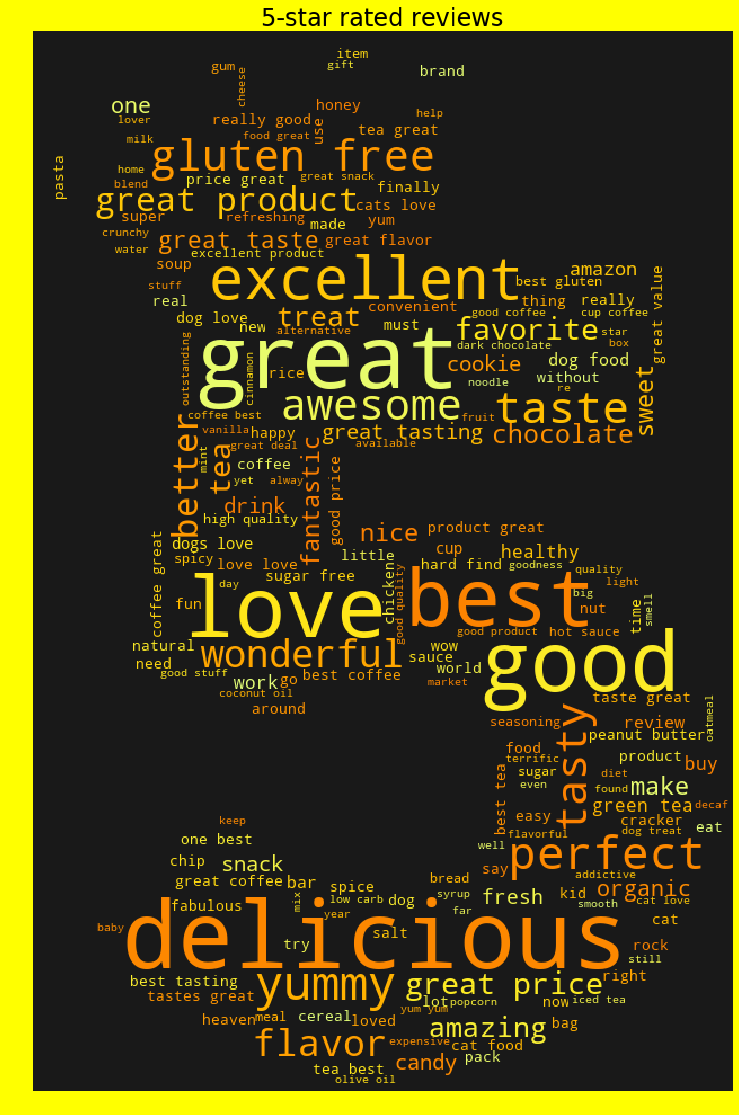

In [169]:
mask = np.array(Image.open('masks-wordclouds/5stars.png'))
word_cloud = WordCloud(width = 500, height = 500, background_color='#191919', colormap="Wistia",
                       mask=mask, stopwords = stop_words, relative_scaling = 1, max_words = 200).generate(score_5)
plt.figure(figsize=(20,15),facecolor = 'yellow', edgecolor='orange')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("5-star rated reviews", fontsize = 24)




In [ ]:
f,ax = plt.subplots(3,1, figsize=(20,10))
plot1,plot2, plot3 = ax.flatten()
